In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Загружаем данные из заготовленного в прошлой лабораторной работе файла .csv

In [2]:
base_df = pd.read_csv("comics.csv")
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1380 non-null   int64  
 1   id                   1380 non-null   float64
 2   name                 1380 non-null   object 
 3   eng_name             974 non-null    object 
 4   rus_name             1294 non-null   object 
 5   cover                1379 non-null   object 
 6   slug                 1380 non-null   object 
 7   type_id              1380 non-null   float64
 8   created_at           1380 non-null   object 
 9   updated_at           1380 non-null   object 
 10  site                 1380 non-null   float64
 11  type                 1380 non-null   object 
 12  modelType            1380 non-null   object 
 13  cover_default        1380 non-null   object 
 14  cover_thumbnail      1380 non-null   object 
 15  coverImage           1380 non-null   o

In [3]:
# Уберем всё лишнее
# Не подходящие для анализов столбцы
import json
norm_mas = ['id', 'name', 'created_at', 'updated_at', 'Release_Year', 'Title_Status', 'Translate_Status', 'Age_restriction', 'Chapters_Loaded', 'User_rates']
df = base_df[norm_mas].copy()
for i, x in enumerate(df.values):
    s1 = str(x[-1])[1:-1]
    if s1.find(',') != -1:
        s2 = list(s1.split(sep=','))
        s3 = list( list(map(int, x.split(sep=':')))   for x in s2 )
        for j in s3:
            df.loc[i, str(j[0])] = j[1]
    else:
        df.drop(index=i)
    # (df.loc[i])[di.keys()] = di.values()
df = df.drop(columns='User_rates')

# Убираем повторы
df = df.drop_duplicates(subset='name')

In [4]:
# В датасете есть повторы, убираем
df = df.drop_duplicates(subset=['name'])
df.name.unique().__len__()

1380

In [5]:
# Заполним нули
df.Age_restriction = df.Age_restriction.fillna(0)
df['Chapters_Loaded']  = df['Chapters_Loaded'].fillna(1)
df = df[df['Release_Year'].notna()] # Избавимся от строк с пустыми значениями
df = df[df['Title_Status'].notna()]
for i in range(1, 11):
    df[str(i)] = df[str(i)].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1379
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1301 non-null   float64
 1   name              1301 non-null   object 
 2   created_at        1301 non-null   object 
 3   updated_at        1301 non-null   object 
 4   Release_Year      1301 non-null   float64
 5   Title_Status      1301 non-null   object 
 6   Translate_Status  1301 non-null   object 
 7   Age_restriction   1301 non-null   object 
 8   Chapters_Loaded   1301 non-null   float64
 9   10                1301 non-null   float64
 10  9                 1301 non-null   float64
 11  8                 1301 non-null   float64
 12  7                 1301 non-null   float64
 13  6                 1301 non-null   float64
 14  5                 1301 non-null   float64
 15  4                 1301 non-null   float64
 16  3                 1301 non-null   float64


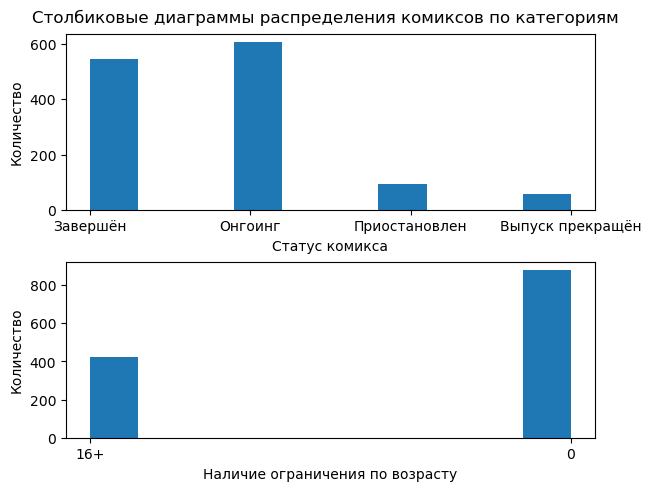

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True)
fig.suptitle('Столбиковые диаграммы распределения комиксов по категориям')
ax1.hist(df['Title_Status'], stacked=True, density=False)
ax1.set_ylabel('Количество')
ax1.set_xlabel('Статус комикса')
pseudo = list(str(x) for x in df['Age_restriction'])
ax2.hist(pseudo, stacked=True, density=False)
ax2.set_ylabel('Количество')
ax2.set_xlabel('Наличие ограничения по возрасту')
plt.show()

In [7]:
# Заменим 16+ на 1
int_mas = ['id', 'Release_Year', 'Age_restriction', 'Chapters_Loaded', '10', '9','8','7','6','5','4','3','2','1']
df.loc[df['Age_restriction'] == '16+', 'Age_restriction'] = 1
df[int_mas] = df[int_mas].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301 entries, 0 to 1379
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1301 non-null   int64 
 1   name              1301 non-null   object
 2   created_at        1301 non-null   object
 3   updated_at        1301 non-null   object
 4   Release_Year      1301 non-null   int64 
 5   Title_Status      1301 non-null   object
 6   Translate_Status  1301 non-null   object
 7   Age_restriction   1301 non-null   int64 
 8   Chapters_Loaded   1301 non-null   int64 
 9   10                1301 non-null   int64 
 10  9                 1301 non-null   int64 
 11  8                 1301 non-null   int64 
 12  7                 1301 non-null   int64 
 13  6                 1301 non-null   int64 
 14  5                 1301 non-null   int64 
 15  4                 1301 non-null   int64 
 16  3                 1301 non-null   int64 
 17  2             

In [8]:
# Для удобства анализа лучше перевести в bool
df['Age_restriction'] = df['Age_restriction'].astype(bool)
df['Age_restriction']

0        True
1       False
2        True
3       False
4        True
        ...  
1375    False
1376    False
1377    False
1378    False
1379     True
Name: Age_restriction, Length: 1301, dtype: bool

## Вычисляем рейтинг

In [9]:
df['Num_Rates'] = df['10'] + df['9'] + df['8'] + df['7'] + df['6'] + df['5'] + df['4'] + df['3'] + df['2'] + df['1']

In [10]:
df['Myrate'] = 0
for i in range(1, 11):
    df['Myrate'] += df[str(i)] * (i)
df['Myrate'] /= df['Num_Rates'] 
df['Myrate'] = df['Myrate'].fillna(0)
df.sort_values('Myrate')

,id,name,created_at,updated_at,Release_Year,Title_Status,Translate_Status,Age_restriction,Chapters_Loaded,10,...,8,7,6,5,4,3,2,1,Num_Rates,Myrate
1206,84267,Alt-shift,2021-06-30T09:04:06.000000Z,2023-11-01T03:58:10.000000Z,2016,Онгоинг,Продолжается,False,20,0,...,0,0,0,0,0,0,0,0,0,0.000000
1326,96742,Bracolate,2021-09-27T15:49:11.000000Z,2023-10-31T19:08:21.000000Z,2020,Завершён,Завершен,False,6,0,...,0,0,0,0,0,0,0,0,0,0.000000
1183,19827,"Клинок, рассекающий демонов: Музыка Гнева",2019-12-21T05:42:59.000000Z,2023-11-01T05:17:56.000000Z,2019,Выпуск прекращён,Продолжается,False,3,9,...,5,1,6,0,7,1,1,15,45,4.911111
312,39833,TLOA,2020-07-09T17:35:23.000000Z,2023-11-01T05:14:51.000000Z,2020,Онгоинг,Заморожен,False,11,57,...,14,0,20,0,11,2,0,86,190,4.936842
634,53534,klop,2020-11-20T12:51:55.000000Z,2023-11-01T05:03:34.000000Z,2020,Онгоинг,Продолжается,True,6,35,...,5,0,2,0,1,0,0,46,89,5.078652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,178546,Bunny calamities,2023-08-30T05:49:19.000000Z,2023-11-01T05:28:00.000000Z,2022,Онгоинг,Продолжается,False,70,37,...,0,0,0,0,0,0,0,0,39,9.948718
908,98194,Потерянное поколение,2021-10-10T09:34:18.000000Z,2023-10-31T21:36:22.000000Z,2016,Онгоинг,Продолжается,True,11,59,...,0,1,0,0,0,0,0,0,60,9.950000
788,170202,Miss D and the Manthing,2023-06-07T18:11:18.000000Z,2023-11-01T03:32:01.000000Z,2023,Онгоинг,Продолжается,False,30,67,...,0,0,0,0,0,0,0,0,70,9.957143
611,58120,How to be a Mind Reaver,2020-12-31T17:31:54.000000Z,2023-11-01T04:43:48.000000Z,2019,Онгоинг,Продолжается,False,119,92,...,2,0,0,0,0,0,0,0,94,9.957447


In [11]:
# дополнительно отфильтруем имеющиеся данные
df['Chapters_Loaded'] = df['Chapters_Loaded'].fillna(0)
df.loc[df['Chapters_Loaded'] > 751, 'Chapters_Loaded'] = 750
df = df[df['Myrate'] > 6]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 0 to 1379
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1292 non-null   int64  
 1   name              1292 non-null   object 
 2   created_at        1292 non-null   object 
 3   updated_at        1292 non-null   object 
 4   Release_Year      1292 non-null   int64  
 5   Title_Status      1292 non-null   object 
 6   Translate_Status  1292 non-null   object 
 7   Age_restriction   1292 non-null   bool   
 8   Chapters_Loaded   1292 non-null   int64  
 9   10                1292 non-null   int64  
 10  9                 1292 non-null   int64  
 11  8                 1292 non-null   int64  
 12  7                 1292 non-null   int64  
 13  6                 1292 non-null   int64  
 14  5                 1292 non-null   int64  
 15  4                 1292 non-null   int64  
 16  3                 1292 non-null   int64  


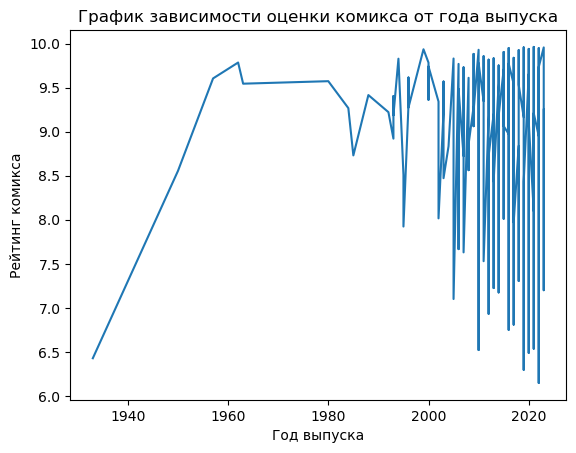

In [13]:
# Проверим наличие видимой зависимости оценки комикса от года выпуска
df_year = df.sort_values(by='Release_Year')
df_year = df_year.where(df['Release_Year'] > 1930)
plt.plot(df_year['Release_Year'], df_year['Myrate'])
plt.title('График зависимости оценки комикса от года выпуска')
plt.xlabel("Год выпуска",)
plt.ylabel("Рейтинг комикса",)
plt.show()

### Посмотрим различную статистику относительно собранных данных

In [14]:
print("Количество комиксов по статусам\n", df.groupby('Title_Status')['Title_Status'].count())
print("\nСредняя оценка комиксов по статусам\n", df.groupby('Title_Status')['Myrate'].mean().sort_values())

Количество комиксов по статусам
 Title_Status
Выпуск прекращён     58
Завершён            541
Онгоинг             601
Приостановлен        92
Name: Title_Status, dtype: int64

Средняя оценка комиксов по статусам
 Title_Status
Завершён            9.065992
Выпуск прекращён    9.148730
Приостановлен       9.167083
Онгоинг             9.253765
Name: Myrate, dtype: float64


In [15]:
# df = df.dropna()
for j in range(len(df['Chapters_Loaded'])):
    jj = df.iloc[j]['id']
    i = df.iloc[j]['Chapters_Loaded']
    if int(i) <= 3:
        df.loc[df['id']==jj, 'Chapters_Loaded_2'] = '<=003'
    elif int(i) <= 10:
        df.loc[df['id']==jj, 'Chapters_Loaded_2'] = '<=010'
    elif int(i) <= 25:
        df.loc[df['id']==jj, 'Chapters_Loaded_2'] = '<=025'
    elif int(i) <= 50:
        df.loc[df['id']==jj, 'Chapters_Loaded_2'] = '<=050'
    elif int(i) <= 250:
        df.loc[df['id']==jj, 'Chapters_Loaded_2'] = '<=250'
    else:
        df.loc[df['id']==jj, 'Chapters_Loaded_2'] = '>250'
print("Распределение комиксов по группам, отсортированных по количеству выпусков")    
df.groupby('Chapters_Loaded_2')['Chapters_Loaded_2'].count().sort_index()

Распределение комиксов по группам, отсортированных по количеству выпусков


Chapters_Loaded_2
<=003    338
<=010    288
<=025    264
<=050    189
<=250    188
>250      25
Name: Chapters_Loaded_2, dtype: int64

In [16]:
print('Средний рейтинг тайтла по группам относительно количества глав:', df.groupby('Chapters_Loaded_2')['Myrate'].mean())

Средний рейтинг тайтла по группам относительно количества глав: Chapters_Loaded_2
<=003    9.071785
<=010    9.133572
<=025    9.249513
<=050    9.187757
<=250    9.218923
>250     9.278608
Name: Myrate, dtype: float64


In [17]:
df = df.drop(labels='id', axis=1)

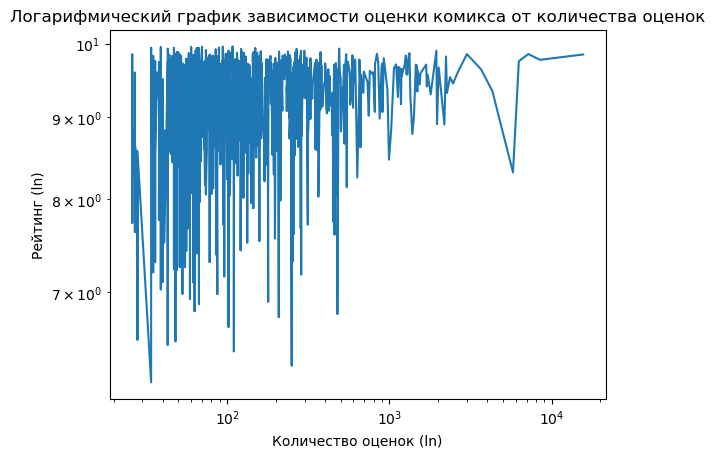

In [18]:
df = df.sort_values(by='Num_Rates')
plt.loglog(df['Num_Rates'],df['Myrate'])
plt.title('Логарифмический график зависимости оценки комикса от количества оценок')
plt.xlabel('Количество оценок (ln)')
plt.ylabel('Рейтинг (ln)')
plt.show()

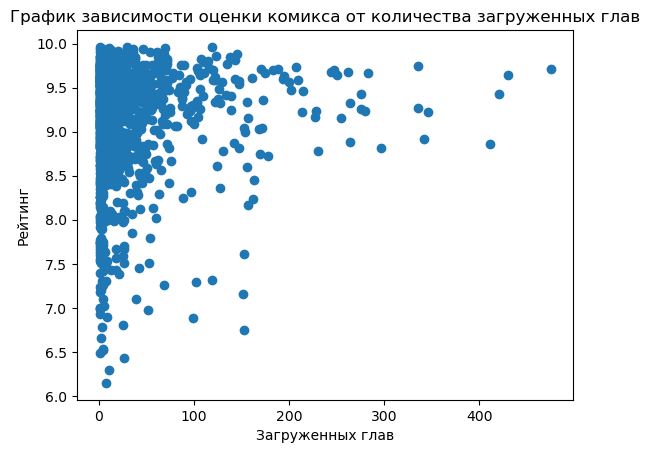

In [19]:
ddf = df.where((df['Myrate'] > 6) & (df['Chapters_Loaded'] < 500))
plt.scatter(ddf['Chapters_Loaded'], ddf['Myrate'] )
plt.title('График зависимости оценки комикса от количества загруженных глав')
plt.xlabel('Загруженных глав')
plt.ylabel('Рейтинг')
plt.show()

In [20]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 1337 to 0
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   name               1292 non-null   object             
 1   created_at         1292 non-null   datetime64[ns, UTC]
 2   updated_at         1292 non-null   datetime64[ns, UTC]
 3   Release_Year       1292 non-null   int64              
 4   Title_Status       1292 non-null   object             
 5   Translate_Status   1292 non-null   object             
 6   Age_restriction    1292 non-null   bool               
 7   Chapters_Loaded    1292 non-null   int64              
 8   10                 1292 non-null   int64              
 9   9                  1292 non-null   int64              
 10  8                  1292 non-null   int64              
 11  7                  1292 non-null   int64              
 12  6                  1292 non-null   int64        

In [22]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

name
['All in all - monsters' 'Недавно с тобой' 'Подработка у Бабы Яги' ...
 'Тёмный замок' 'The Little Trashmaid'
 'Love Advice from the Great Duke of Hell']

created_at
<DatetimeArray>
['2020-11-30 11:45:03+00:00', '2023-08-19 13:48:48+00:00',
 '2023-07-16 04:40:21+00:00', '2023-07-15 14:26:04+00:00',
 '2023-06-03 08:03:34+00:00', '2023-04-08 16:51:31+00:00',
 '2023-02-06 15:58:24+00:00', '2023-01-10 15:35:07+00:00',
 '2022-09-25 16:33:08+00:00', '2022-08-30 12:31:01+00:00',
 ...
 '2020-06-09 05:30:29+00:00', '2022-05-12 12:52:23+00:00',
 '2020-05-20 00:39:05+00:00', '2019-05-13 11:32:13+00:00',
 '2021-08-10 07:52:22+00:00', '2018-12-23 05:53:32+00:00',
 '2019-02-11 15:28:42+00:00', '2020-08-30 09:02:21+00:00',
 '2019-11-30 09:31:44+00:00', '2018-12-14 05:32:54+00:00']
Length: 1292, dtype: datetime64[ns, UTC]

updated_at
<DatetimeArray>
['2023-10-31 19:49:11+00:00', '2023-11-01 01:42:40+00:00',
 '2023-10-31 19:08:30+00:00', '2023-11-01 05:20:06+00:00',
 '2023-11-01 04:43:48+00:00', '

### Составим матрицу корреляций

In [23]:
mas = ['created_at', 'updated_at', 'Release_Year', 'Chapters_Loaded', 'Age_restriction',
       '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', 'Num_Rates', 'Myrate'] 
df_corr = df[mas]

In [24]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\kanze\AppData\Local\Temp\ipykernel_5416\1851236766.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_corr.corr()


,Release_Year,Chapters_Loaded,Age_restriction,10,9,8,7,6,5,4,3,2,1,Num_Rates,Myrate
Release_Year,1.000000,-0.231875,-0.051431,0.028990,0.033457,0.014024,0.011232,0.009135,0.044598,0.019550,0.048212,-0.000149,0.013874,0.028753,0.073379
Chapters_Loaded,-0.231875,1.000000,-0.086786,0.144665,0.089800,0.093816,0.088151,0.065006,0.068051,0.068190,0.075551,0.203060,0.107115,0.144781,0.045312
Age_restriction,-0.051431,-0.086786,1.000000,0.028441,0.048495,0.034816,0.053651,0.057602,0.070708,0.067124,0.040506,0.044434,0.063359,0.033177,-0.138831
10,0.028990,0.144665,0.028441,1.000000,0.840887,0.656940,0.642336,0.464953,0.449866,0.407664,0.431034,0.364440,0.447938,0.994852,0.126338
9,0.033457,0.089800,0.048495,0.840887,1.000000,0.630023,0.795537,0.426817,0.611001,0.355748,0.545108,0.399720,0.352640,0.847493,0.113988
8,0.014024,0.093816,0.034816,0.656940,0.630023,1.000000,0.785615,0.916661,0.705837,0.841316,0.626608,0.656559,0.744239,0.726527,-0.046975
7,0.011232,0.088151,0.053651,0.642336,0.795537,0.785615,1.000000,0.654498,0.789642,0.573715,0.665163,0.525243,0.510786,0.687671,-0.010722
6,0.009135,0.065006,0.057602,0.464953,0.426817,0.916661,0.654498,1.000000,0.664013,0.958720,0.584962,0.735250,0.827118,0.549348,-0.157371
5,0.044598,0.068051,0.070708,0.449866,0.611001,0.705837,0.789642,0.664013,1.000000,0.612230,0.695569,0.571202,0.529489,0.506084,-0.093344
4,0.019550,0.068190,0.067124,0.407664,0.355748,0.841316,0.573715,0.958720,0.612230,1.000000,0.556964,0.758819,0.865878,0.491782,-0.185341


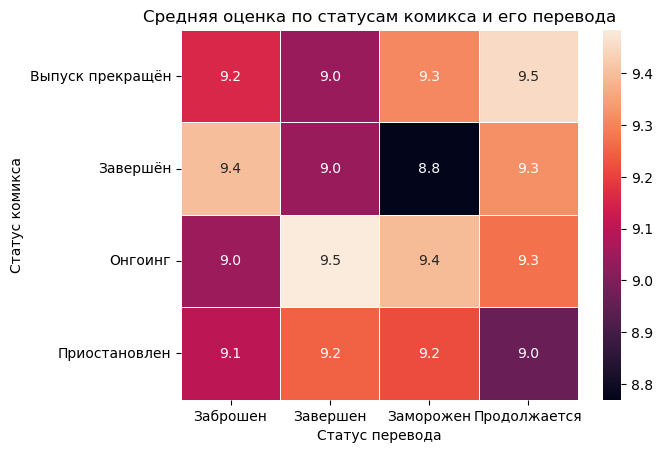

In [25]:
import seaborn as sns
platform_genre_sales = df.pivot_table(
                        index='Title_Status', 
                        columns='Translate_Status', 
                        values='Myrate', 
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)
plt.title('Средняя оценка по статусам комикса и его перевода')
plt.xlabel('Статус перевода')
plt.ylabel('Статус комикса')
plt.show()

Матрица корреляций с учетом переведенных в бинарные категориальных данных

In [26]:
mas1 = ['created_at', 'updated_at', 'Release_Year', 'Chapters_Loaded', 'Age_restriction', 
       'Title_Status','Translate_Status',  'Myrate'] # 'Num_Rates',
df_corr2 = pd.get_dummies(df[mas1], columns=['Title_Status','Translate_Status'])
corr1 = df_corr2.corr()
corr1.style.background_gradient(cmap='coolwarm')

C:\Users\kanze\AppData\Local\Temp\ipykernel_5416\3736051422.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df_corr2.corr()


,Release_Year,Chapters_Loaded,Age_restriction,Myrate,Title_Status_Выпуск прекращён,Title_Status_Завершён,Title_Status_Онгоинг,Title_Status_Приостановлен,Translate_Status_Заброшен,Translate_Status_Завершен,Translate_Status_Заморожен,Translate_Status_Продолжается
Release_Year,1.000000,-0.231875,-0.051431,0.073379,0.028177,-0.248885,0.207448,0.052421,-0.003401,-0.201134,0.047173,0.178802
Chapters_Loaded,-0.231875,1.000000,-0.086786,0.045312,-0.009297,-0.144616,0.147376,-0.000924,0.013339,-0.196900,-0.002945,0.190854
Age_restriction,-0.051431,-0.086786,1.000000,-0.138831,0.016753,-0.034429,0.027027,0.000139,-0.042934,-0.011834,0.010907,0.028518
Myrate,0.073379,0.045312,-0.138831,1.000000,-0.005377,-0.133259,0.133393,0.001253,-0.027025,-0.148750,0.036115,0.144265
Title_Status_Выпуск прекращён,0.028177,-0.009297,0.016753,-0.005377,1.000000,-0.184007,-0.202188,-0.060029,0.086406,0.070023,0.018634,-0.123620
Title_Status_Завершён,-0.248885,-0.144616,-0.034429,-0.133259,-0.184007,1.000000,-0.791547,-0.235008,-0.172317,0.838344,-0.204723,-0.645061
Title_Status_Онгоинг,0.207448,0.147376,0.027027,0.133393,-0.202188,-0.791547,1.000000,-0.258227,0.125350,-0.775963,-0.113756,0.765364
Title_Status_Приостановлен,0.052421,-0.000924,0.000139,0.001253,-0.060029,-0.235008,-0.258227,1.000000,0.017880,-0.159654,0.598364,-0.147424
Translate_Status_Заброшен,-0.003401,0.013339,-0.042934,-0.027025,0.086406,-0.172317,0.125350,0.017880,1.000000,-0.237365,-0.072586,-0.243046
Translate_Status_Завершен,-0.201134,-0.196900,-0.011834,-0.148750,0.070023,0.838344,-0.775963,-0.159654,-0.237365,1.000000,-0.227391,-0.761389


In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN

In [28]:
def calculate_metrics(df, max_clusters):
    km_scores= []
    silhouette_scores = []
    db_scores = []

    for i in range(2, max_clusters):
        print("Количество кластеров: {}".format(i))

        km = KMeans(n_clusters=i, random_state=0, n_init=1).fit(df)
        preds = km.predict(df)

        km_score = -km.score(df)
        km_scores.append(km_score)
        print("Метрика K-Means (локоть): {}".format(km_score))

        silhouette = silhouette_score(df,preds)
        silhouette_scores.append(silhouette)
        print("Метрика силуэтов: {}".format(silhouette))

        db = davies_bouldin_score(df,preds)
        db_scores.append(db)
        print("Метрика Davies Bouldin: {}".format(db))

        print("-"*100)
    return {"km": km_scores, "silhouette":silhouette_scores, "db": db_scores}

In [29]:
def print_scores(scores):
    x=[i for i in range(2,2+len(scores["km"]))]

    plt.figure(figsize=(7,4))
    plt.title("Метод локтя для определения количества кластеров\n",fontsize=16)
    plt.scatter(x = x, y=scores["km"], s=150, edgecolor='k')
    plt.grid(True)
    plt.xlabel("Количество кластеров, шт",fontsize=14)
    plt.ylabel("Метрика K-Means",fontsize=15)
    plt.xticks(x,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    plt.figure(figsize=(7,4))
    plt.title("Метрика силуэтов для определения количества кластеров\n",fontsize=16)
    plt.scatter(x=x,y=scores["silhouette"],s=150,edgecolor='k')
    plt.grid(True)
    plt.xlabel("Количество кластров, шт",fontsize=14)
    plt.ylabel("Метрика силуэтов",fontsize=15)
    plt.xticks(x,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

    plt.scatter(x=x,y=scores["db"],s=150,edgecolor='k')
    plt.grid(True)
    plt.xlabel("Количество кластров, шт",fontsize=14)
    plt.ylabel("Метрика Davies-Bouldin",fontsize=14)
    plt.xticks(x,fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

## Определяем количесвто кластеров

In [30]:
scalers = {}
dfs = df_corr2.copy(deep=True)
for c in df_corr2.columns:
    scalers[c] = MinMaxScaler().fit(dfs[c].values.reshape(-1,1))
    dfs[c] = scalers[c].transform(dfs[c].values.reshape(-1,1))

Количество кластеров: 2
Метрика K-Means (локоть): 1033.8573485671839
Метрика силуэтов: 0.47853620956268056
Метрика Davies Bouldin: 0.8976279753329216
----------------------------------------------------------------------------------------------------
Количество кластеров: 3
Метрика K-Means (локоть): 824.1197249108026
Метрика силуэтов: 0.51359101680656
Метрика Davies Bouldin: 1.0781003974246437
----------------------------------------------------------------------------------------------------
Количество кластеров: 4
Метрика K-Means (локоть): 681.7733173781744
Метрика силуэтов: 0.47972321821261554
Метрика Davies Bouldin: 1.0374296575657458
----------------------------------------------------------------------------------------------------
Количество кластеров: 5
Метрика K-Means (локоть): 615.3563101041385
Метрика силуэтов: 0.48388364090446173
Метрика Davies Bouldin: 1.3967352026483586
----------------------------------------------------------------------------------------------------
Ко

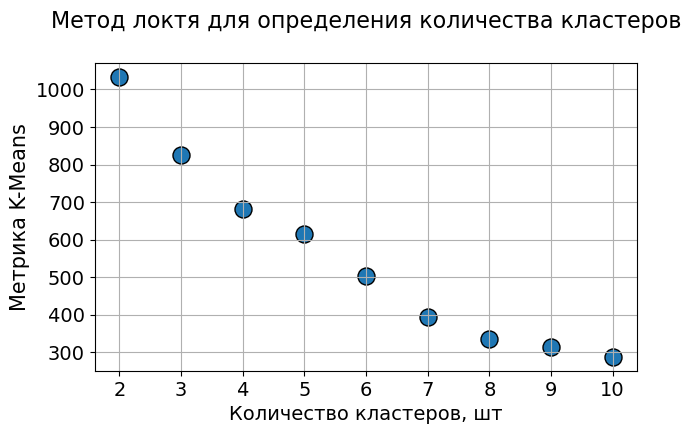

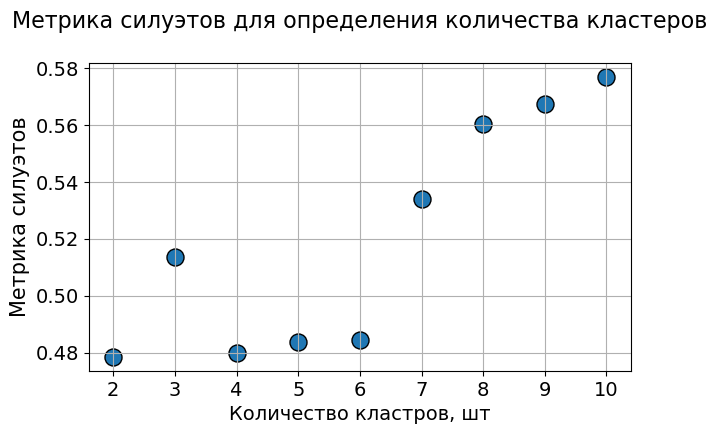

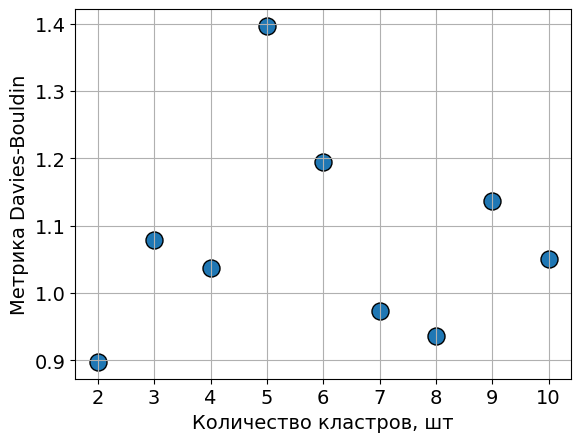

In [31]:
max_clusters = 11
scores = calculate_metrics(dfs, max_clusters)
print_scores(scores)

### Кажется, что оптимальным будет выбор 7 кластеров

In [32]:
model_km_s = KMeans(7, n_init=10)
model_km_s.fit(dfs)
y_pred_km_s = model_km_s.predict(dfs)

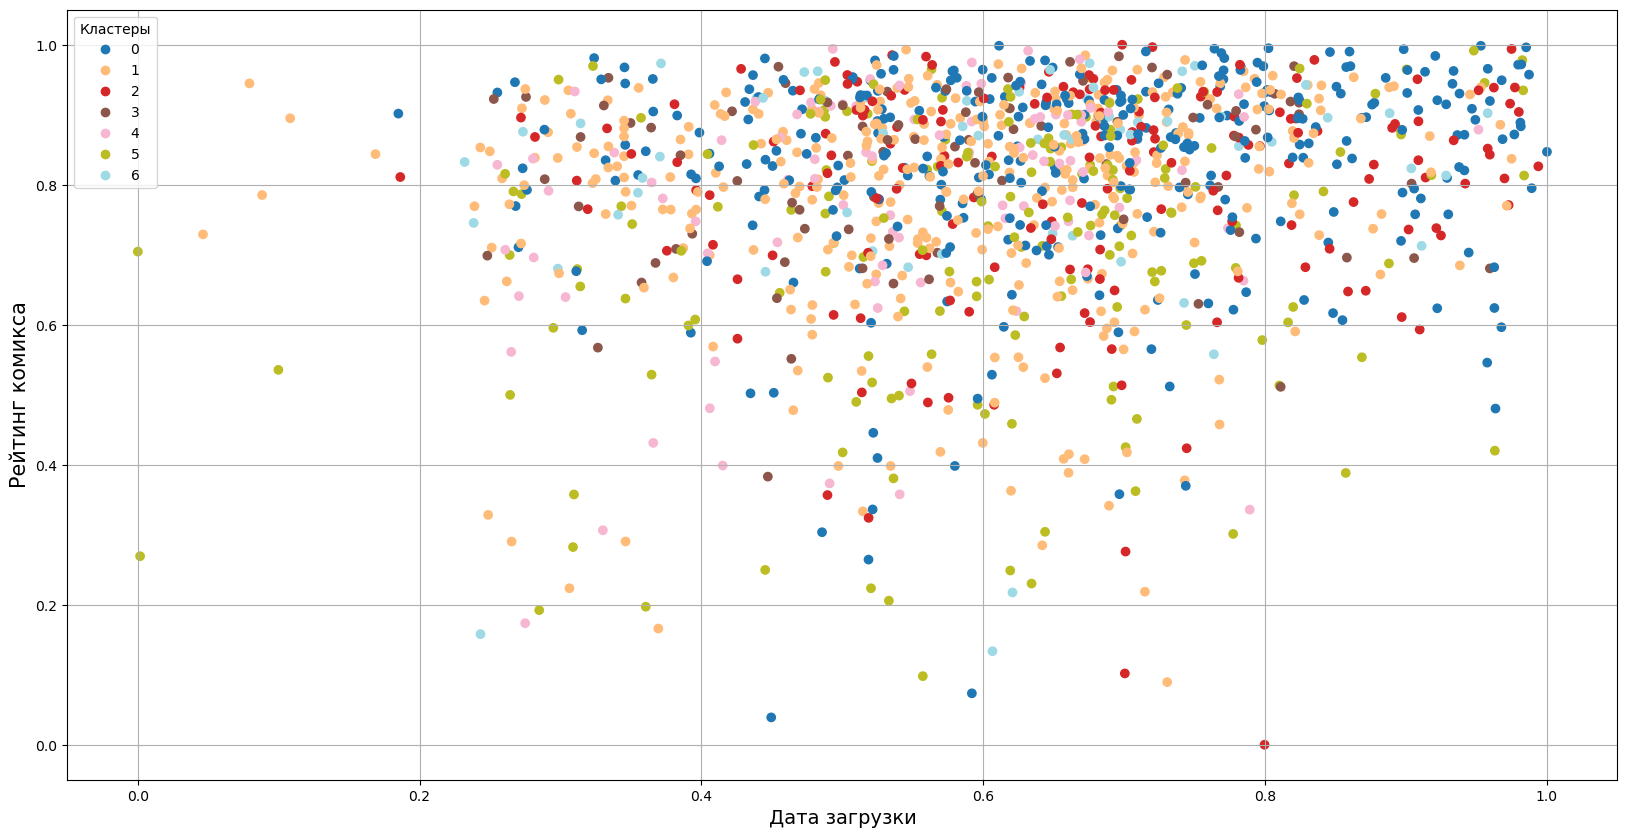

In [33]:
x= dfs['created_at']
y = dfs['Myrate']
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x, y, c=y_pred_km_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Дата загрузки",fontsize=14)
plt.ylabel("Рейтинг комикса",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

Проведем кластеризацию методом dbscan

In [34]:
model_dbscan_s = DBSCAN(eps=0.35, min_samples=100)
y_pred_dbscan_s = model_dbscan_s.fit_predict(dfs)

In [35]:
model_dbscan_s.get_params()

{'algorithm': 'auto',
 'eps': 0.35,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 100,
 'n_jobs': None,
 'p': None}

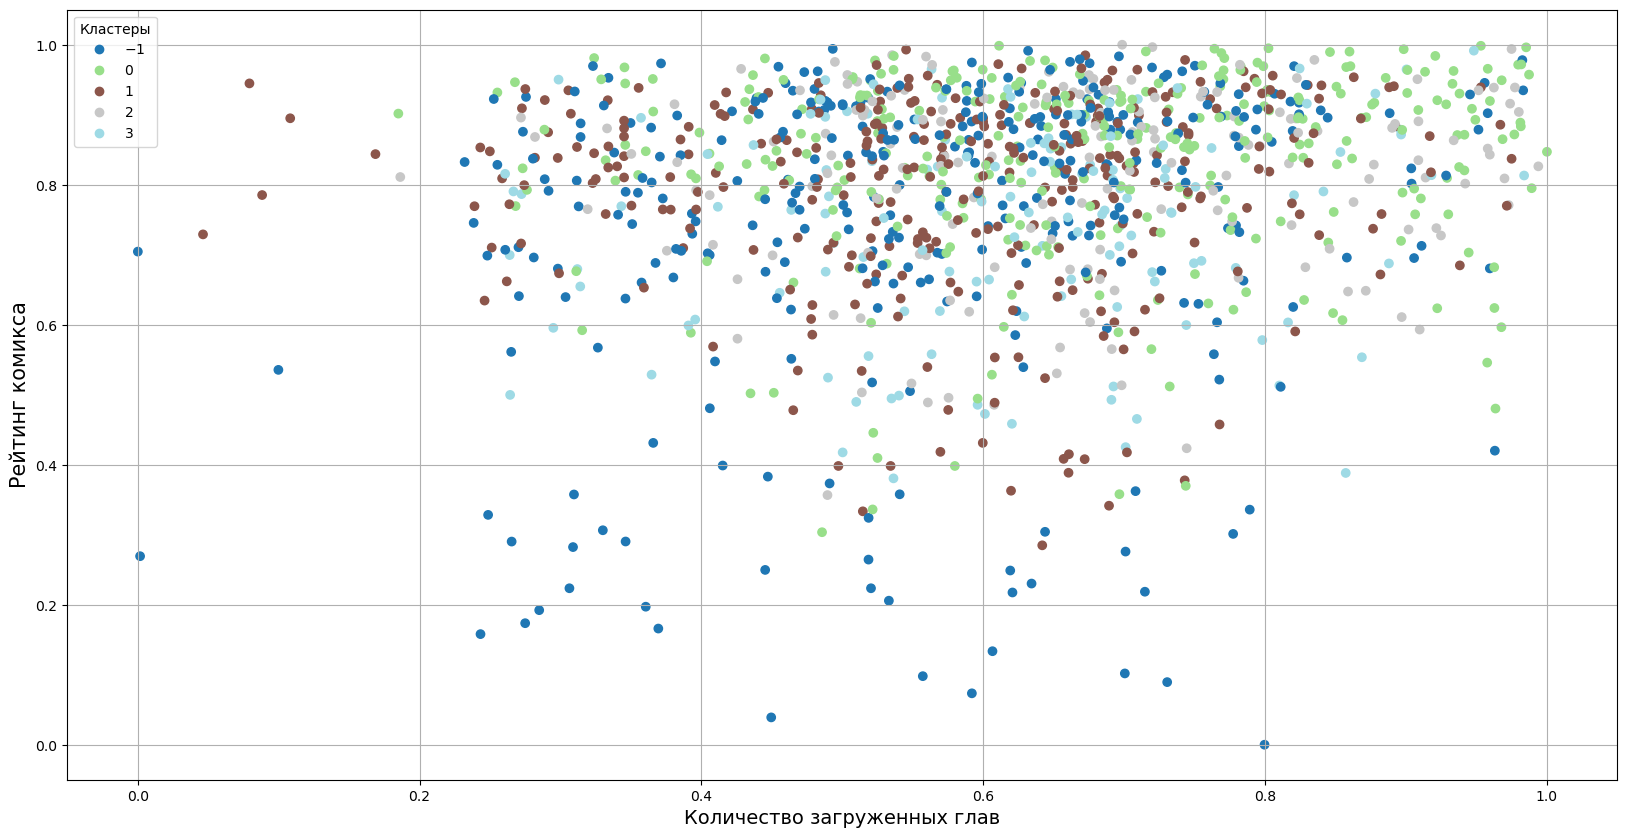

In [36]:
x= dfs['created_at']
y = dfs['Myrate']
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x, y, c=y_pred_dbscan_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Количество загруженных глав",fontsize=14)
plt.ylabel("Рейтинг комикса",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

Данные кластеры не кажутся столь отличными друг от друга

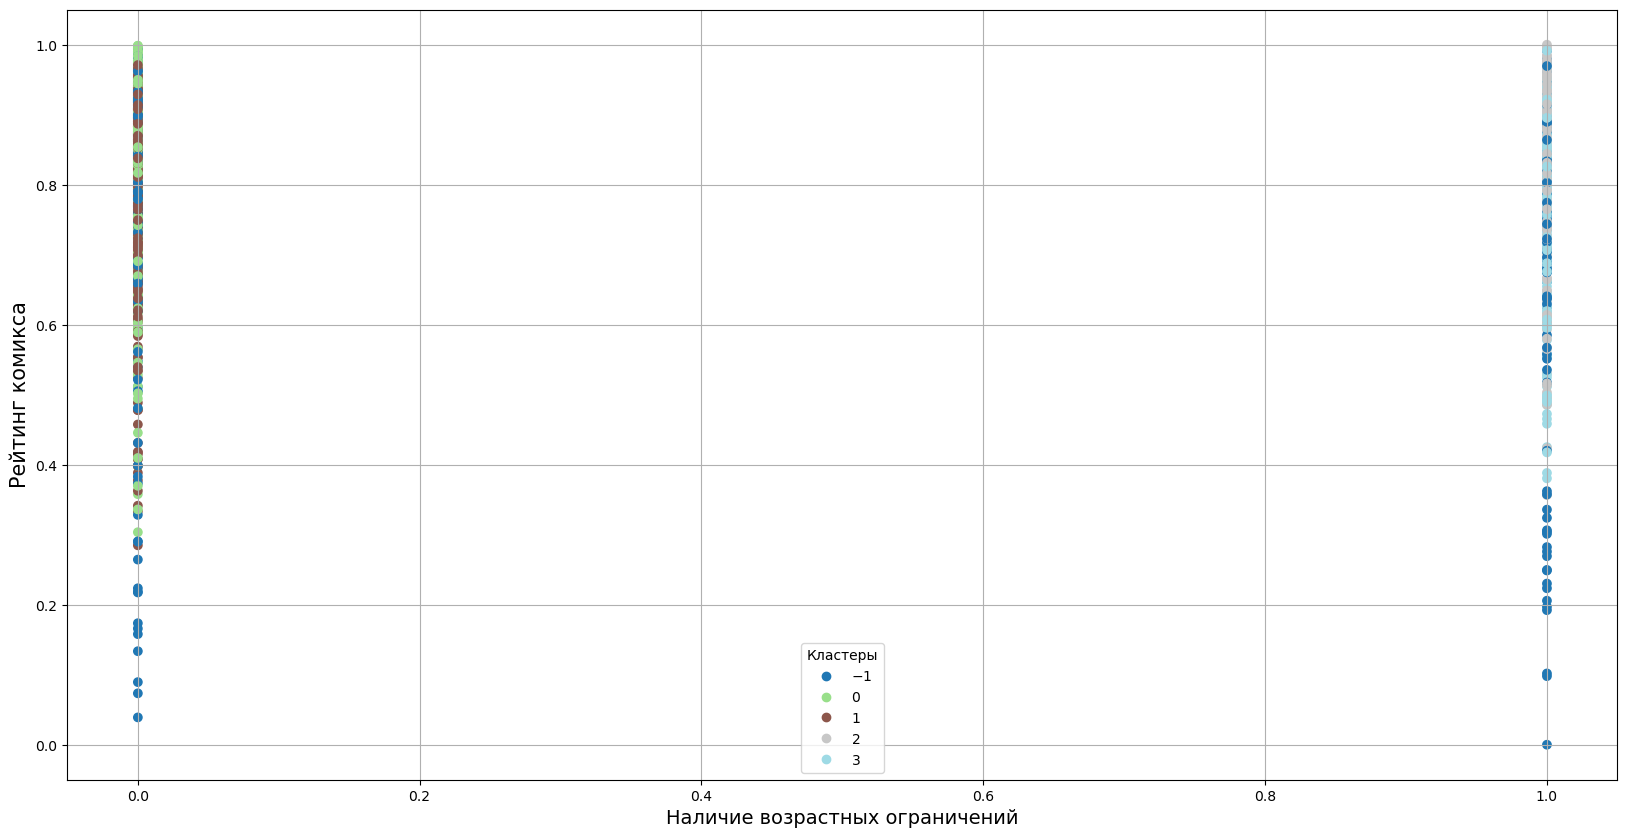

In [37]:
x= dfs['Age_restriction']
y = dfs['Myrate']
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x, y, c=y_pred_dbscan_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Наличие возрастных ограничений",fontsize=14)
plt.ylabel("Рейтинг комикса",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

Здесь кластеры 0 и 1 сконцентроровались относительно левой оси, а 2 и 3 относительно правой.

Уменьшим размерность для получения более различимых кластеров

In [38]:
centers = []
for i in range(0,len(model_km_s.cluster_centers_)):
  coordinates = {}
  for j in range(0,len(df_corr2.columns)):
    coordinates[df_corr2.columns[j]] = scalers[df_corr2.columns[j]].inverse_transform(model_km_s.cluster_centers_[i][j].reshape(-1, 1))[0][0]
  centers.append(coordinates)
centers = pd.DataFrame(centers)
centers

,created_at,updated_at,Release_Year,Chapters_Loaded,Age_restriction,Myrate,Title_Status_Выпуск прекращён,Title_Status_Завершён,Title_Status_Онгоинг,Title_Status_Приостановлен,Translate_Status_Заброшен,Translate_Status_Завершен,Translate_Status_Заморожен,Translate_Status_Продолжается
0,1.621745e+18,1.698806e+18,2019.482036,56.443114,-5.551115e-17,9.313659,-4.857226e-17,-4.440892e-16,1.000000,4.163336e-17,-2.775558e-17,3.885781e-16,5.551115e-17,1.000000e+00
1,1.603033e+18,1.698802e+18,2017.325333,16.456000,-1.665335e-16,9.146957,5.866667e-02,9.066667e-01,0.008000,2.666667e-02,1.387779e-17,1.000000e+00,6.938894e-17,3.885781e-16
2,1.622226e+18,1.698803e+18,2019.850575,29.844828,1.000000e+00,9.184647,-2.081668e-17,-2.220446e-16,1.000000,2.775558e-17,-1.387779e-17,2.220446e-16,-1.387779e-17,1.000000e+00
3,1.600713e+18,1.698802e+18,2019.228916,33.662651,3.373494e-01,9.270691,6.024096e-02,2.409639e-02,0.253012,6.626506e-01,-1.387779e-17,5.551115e-17,1.000000e+00,-1.110223e-16
4,1.593430e+18,1.698801e+18,2017.945055,37.758242,2.527473e-01,9.102807,1.098901e-01,1.098901e-01,0.692308,8.791209e-02,1.000000e+00,-1.110223e-16,0.000000e+00,-1.110223e-16
5,1.608241e+18,1.698804e+18,2014.954802,19.299435,1.000000e+00,8.855590,6.779661e-02,8.813559e-01,0.033898,1.694915e-02,-1.387779e-17,9.943503e-01,5.649718e-03,2.775558e-16
6,1.606804e+18,1.698805e+18,2016.379310,74.362069,3.275862e-01,9.240529,1.551724e-01,5.689655e-01,0.000000,2.758621e-01,-1.387779e-17,5.551115e-17,1.387779e-17,1.000000e+00


In [39]:
from sklearn.manifold import TSNE

In [40]:
df_corr2.shape

(1292, 14)

In [41]:
# Переходим к 2-мерному синтетическому пространству
df_fit = df_corr2.copy()
df_fit['created_at'] = df_fit['created_at'].astype('int64')
df_fit['updated_at'] = df_fit['updated_at'].astype('int64')
X_embedded = TSNE(
    n_components=2,
    learning_rate='auto',
    init='random',
    perplexity=3
).fit_transform(df_fit)
X_embedded.shape

(1292, 2)

In [42]:
model_km_embedded = KMeans(7, n_init=10)
model_km_embedded.fit(X_embedded)
y_pred_km_embedded = model_km_embedded.predict(X_embedded)

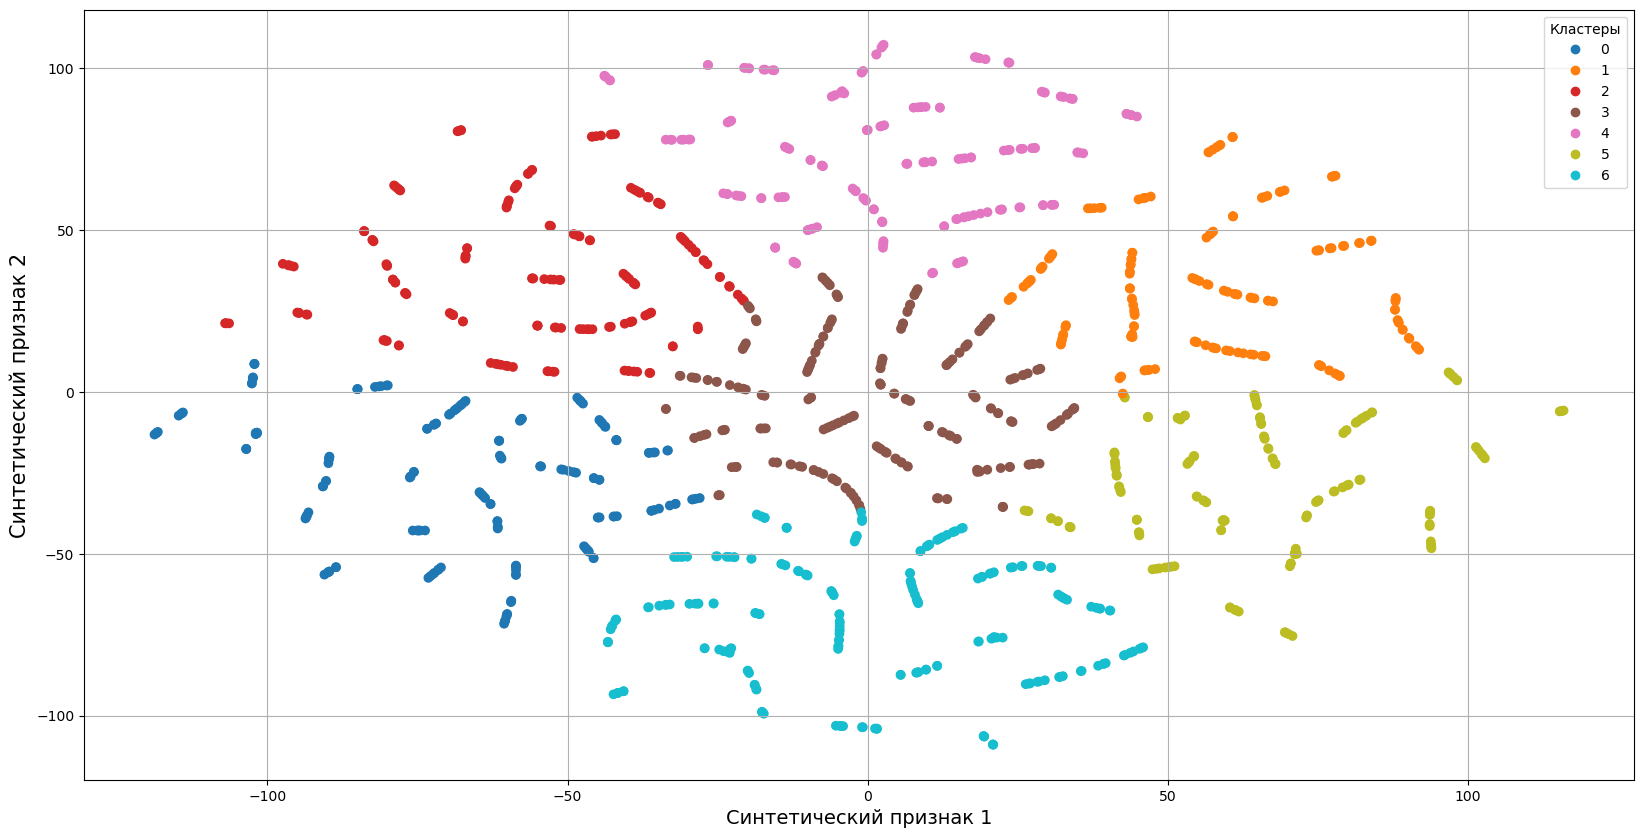

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred_km_embedded, cmap='tab10')
ax.grid(True)
ax.set_xlabel("Синтетический признак 1",fontsize=14)
ax.set_ylabel("Синтетический признак 2",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

## Попробуем ограничиться только целочисленными и вещественными данными:

In [44]:
mas3 = ['created_at', 'updated_at', 'Release_Year', 'Chapters_Loaded', 'Myrate']
df_corr3 = df_corr2[mas3]
scalers = {}
dfs = df_corr3.copy(deep=True)
for c in df_corr3.columns:
    scalers[c] = MinMaxScaler().fit(dfs[c].values.reshape(-1,1))
    dfs[c] = scalers[c].transform(dfs[c].values.reshape(-1,1))

Количество кластеров: 2
Метрика K-Means (локоть): 90.61691747977174
Метрика силуэтов: 0.2441740435314293
Метрика Davies Bouldin: 1.5889717810183042
----------------------------------------------------------------------------------------------------
Количество кластеров: 3
Метрика K-Means (локоть): 72.52978423594928
Метрика силуэтов: 0.26368323768276253
Метрика Davies Bouldin: 1.312776756581794
----------------------------------------------------------------------------------------------------
Количество кластеров: 4
Метрика K-Means (локоть): 59.01218758782609
Метрика силуэтов: 0.29012242951373063
Метрика Davies Bouldin: 1.1062437482120302
----------------------------------------------------------------------------------------------------
Количество кластеров: 5
Метрика K-Means (локоть): 52.14211005898504
Метрика силуэтов: 0.2610884641317424
Метрика Davies Bouldin: 1.1979431992988805
----------------------------------------------------------------------------------------------------
Кол

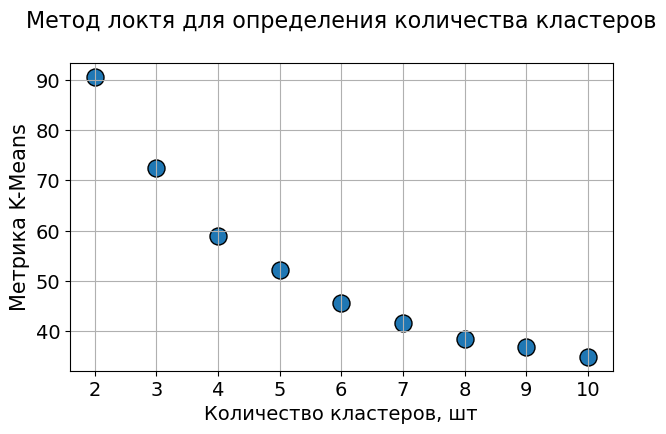

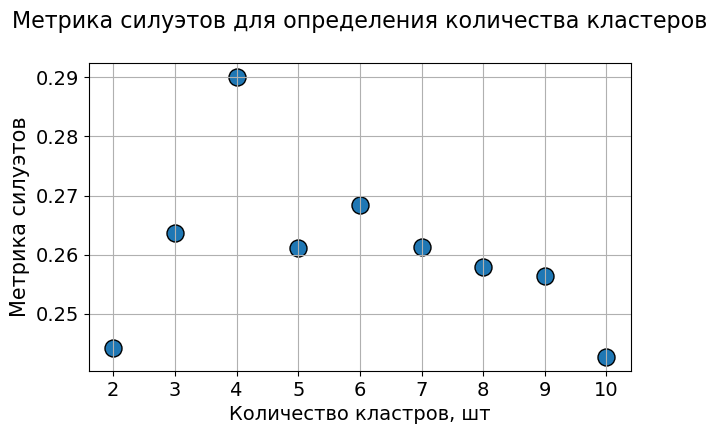

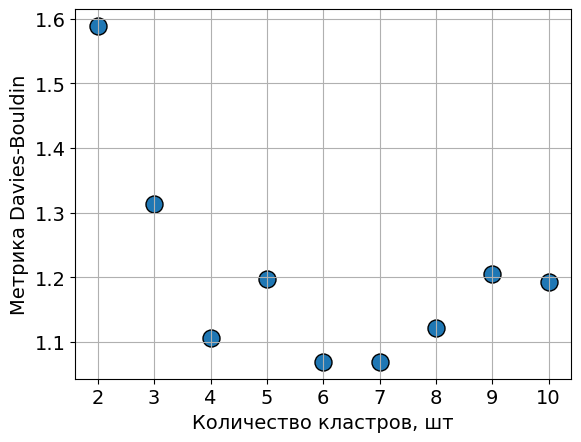

In [45]:
max_clusters = 11
scores = calculate_metrics(dfs, max_clusters)
print_scores(scores)

5 Будет оптимальным количеством кластеров

In [46]:
model_km_s = KMeans(7, n_init=10)
model_km_s.fit(dfs)
y_pred_km_s = model_km_s.predict(dfs)

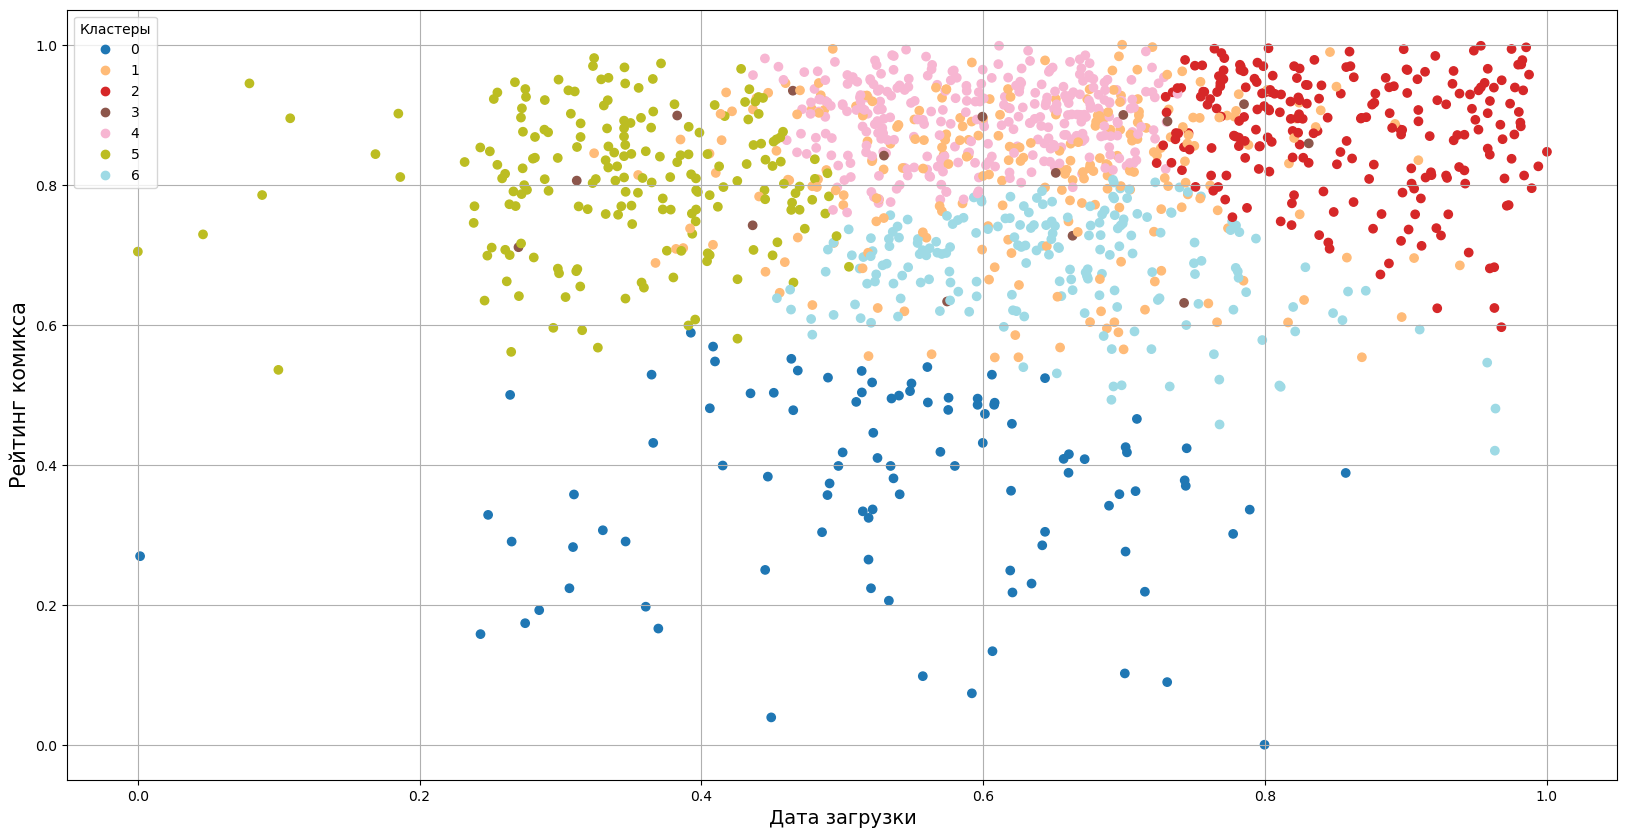

In [47]:
x= dfs['created_at']
y = dfs['Myrate']
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x, y, c=y_pred_km_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Дата загрузки",fontsize=14)
plt.ylabel("Рейтинг комикса",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

Здесь кластеры видны гораздо четче

In [48]:
model_dbscan_s = DBSCAN(eps=0.15, min_samples=100)
y_pred_dbscan_s = model_dbscan_s.fit_predict(dfs)

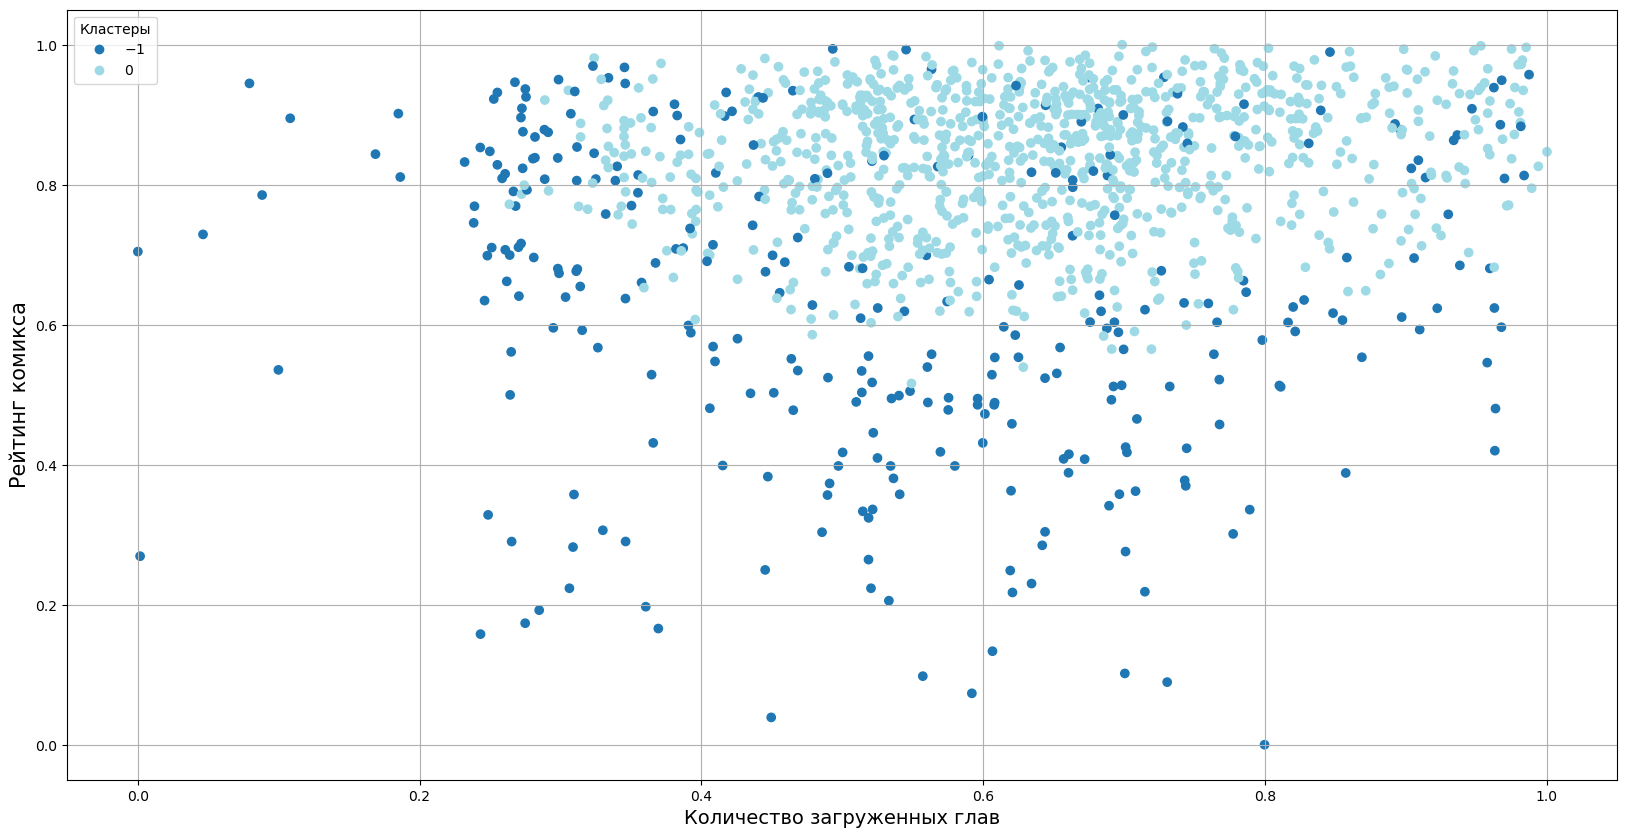

In [49]:
x= dfs['created_at']
y = dfs['Myrate']
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(x, y, c=y_pred_dbscan_s, cmap='tab20')
ax.grid(True)
plt.xlabel("Количество загруженных глав",fontsize=14)
plt.ylabel("Рейтинг комикса",fontsize=15)
ax.legend(*sc.legend_elements(), title='Кластеры')

Dbscan не выдает больше 2 кластеров

В ходе выполнения лабораторной работы были получены навыки обработки данных и подготовки к дальнейшему анализу. Так же в ходе работы были освоены методы анализа данных путем кластеризации 
В ходе выполнения работы были сделаны следующие предположения: наличие бинарных данных сильно влияет на формирование кластеров, что может негативно сказаться на общем качестве работы; чрезмерное количество избыточных данных так же вредит кластеризации.
